# (1) Delivery_time 

In [1]:
# Importing liberies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Read Data

df = pd.read_csv(r"D:\Assignment\Solved Assignments\Simple Linear Regression\delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.shape

(21, 2)

In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Feature Engineering

In [7]:
# Renaming Columns
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## EDA and Data Visualization


In [8]:
df.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

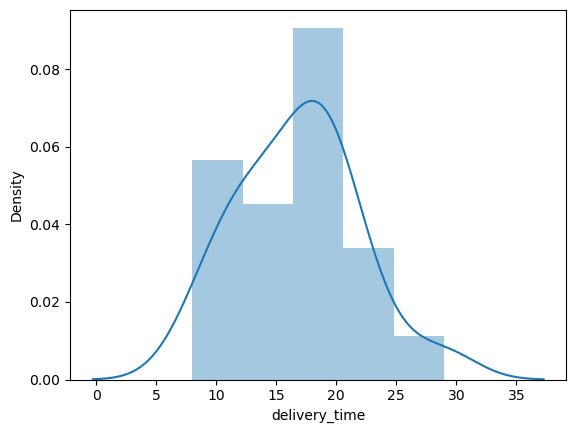

In [10]:
sns.distplot(df['delivery_time'])

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

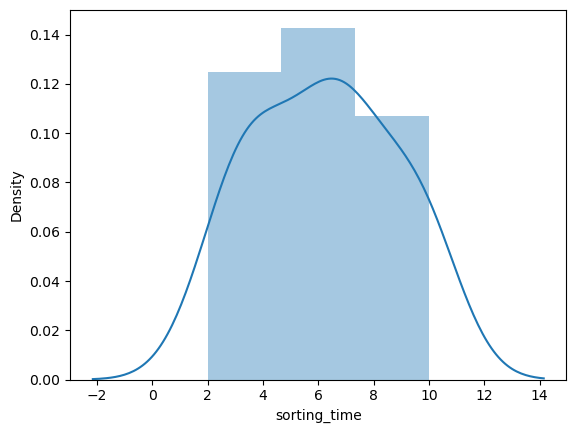

In [11]:
sns.distplot(df['sorting_time'])

## Correlation Analysis

In [12]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:>

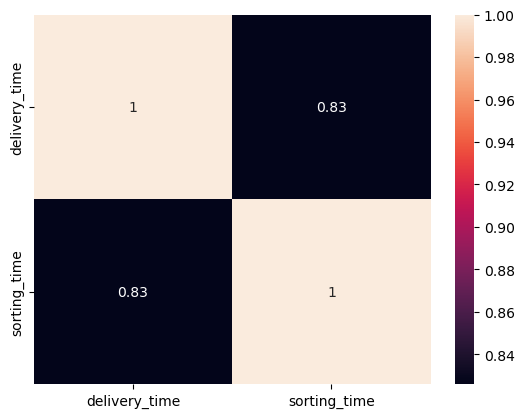

In [13]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

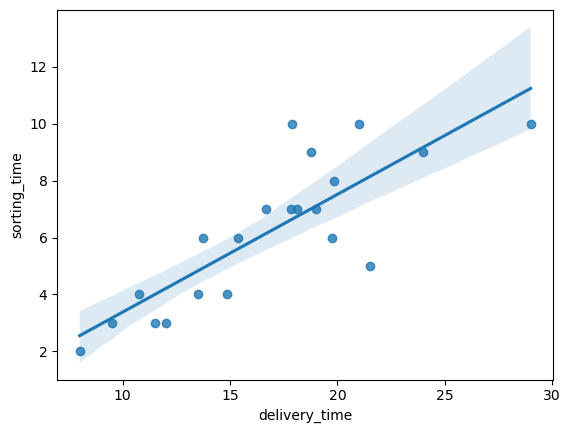

In [14]:
sns.regplot(df['delivery_time'], df['sorting_time'])

## Model Building

In [15]:
model = smf.ols('delivery_time ~ sorting_time', data=df).fit()

In [16]:
model

### Model Testing

In [17]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [18]:
# Finding tvalues and pvalues
print(model.tvalues,model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [19]:
# Finding Rsquared Values
print(model.rsquared, model.rsquared_adj)

0.6822714748417231 0.6655489208860244


## Model Predictions

In [20]:
# Manual prediction 
# y = m(x) + c

delivery_time = (1.649020 * 16)+ 6.582734
delivery_time

32.967054

In [21]:
# Automatic Prediction

new_data = pd.Series([2,6,8,9])
new_data = pd.DataFrame(new_data,columns=['sorting_time'])
new_data

,sorting_time
0,2
1,6
2,8
3,9


In [22]:
model.predict(new_data)

0     9.880774
1    16.476853
2    19.774893
3    21.423913
dtype: float64

In [23]:
df['log_delivery_time'] = np.log(df['delivery_time'])
df['square_delivery_time'] = np.square(df['delivery_time'])
df['sqrt_delivery_time'] = np.sqrt(df['delivery_time'])

df['log_sorting_time'] = np.log(df['sorting_time'])

In [24]:
df.head()

,delivery_time,sorting_time,log_delivery_time
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296


## Transforming data

In [22]:
x = df.iloc[:,0].values
y = df.iloc[:,1].values
x, y

(array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
        18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
         8.  , 17.83, 21.5 ]),
 array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
         7,  2,  7,  5], dtype=int64))

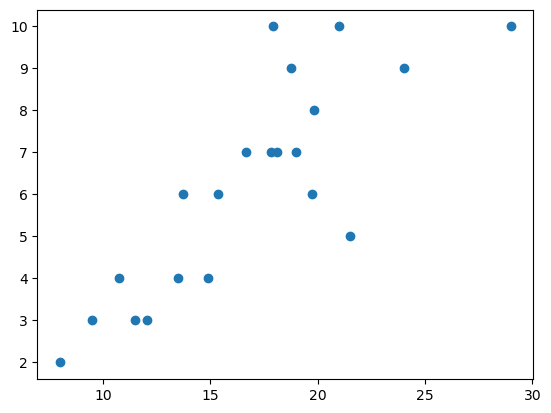

In [23]:
plt.scatter(x,y)

In [24]:
re = LinearRegression()
re.fit(x.reshape(-1,1), y)

ypred =  re.predict(x.reshape(-1,1))
ypred

print(r2_score(y,ypred))
print(np.sqrt(mean_squared_error(y, ypred)))

0.682271474841723
1.398343056795723


In [25]:
# Transforming data (sqrt)

ysqrt = np.sqrt(y)
xsqrt = np.sqrt(x.reshape(-1,1))

re = LinearRegression()
re.fit(xsqrt.reshape(-1,1), y)

ypred =  re.predict(xsqrt.reshape(-1,1))

print(r2_score(ysqrt,ypred))
print(np.sqrt(mean_squared_error(ysqrt,ypred)))

-61.26983791890277
4.107541428506996


In [26]:
# Transforming data (log)

ylog = np.log(y)
xlog = np.log(x.reshape(-1,1))

re = LinearRegression()
re.fit(xlog.reshape(-1,1), y)

ypred =  re.predict(xlog.reshape(-1,1))

print(r2_score(ylog,ypred))
print(np.sqrt(mean_squared_error(ylog,ypred)))

-108.38258189311213
4.776453211703518


In [27]:
# Transforming data (Square)

ysquare = np.square(y)
xsquare = np.square(x.reshape(-1,1))

re = LinearRegression()
re.fit(xsquare.reshape(-1,1), y)

ypred =  re.predict(xsquare.reshape(-1,1))

print(r2_score(ysquare,ypred))
print(np.sqrt(mean_squared_error(ysquare,ypred)))

-1.3883066751957083
48.661856544103124


---------------------------------------------------------------------------------------------------------------------------

# (2) Salary_hike

In [28]:
# Read data

df = pd.read_csv(r"D:\Assignment\Solved Assignments\Simple Linear Regression\Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## EDA and Data Visualization

In [29]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

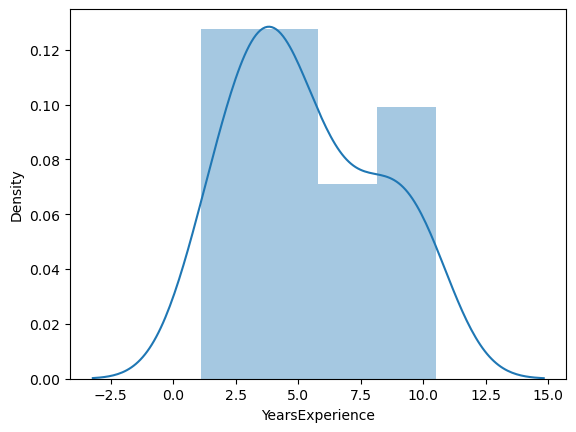

In [31]:
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

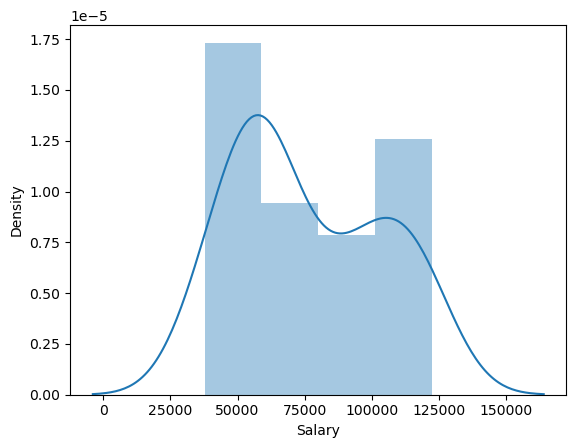

In [32]:
sns.distplot(df['Salary'])

## Correlation Analysis

In [33]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

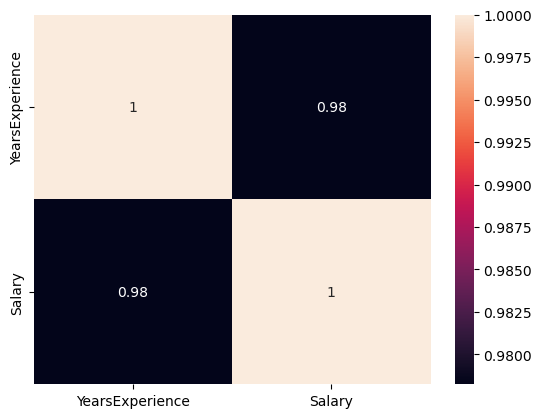

In [34]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

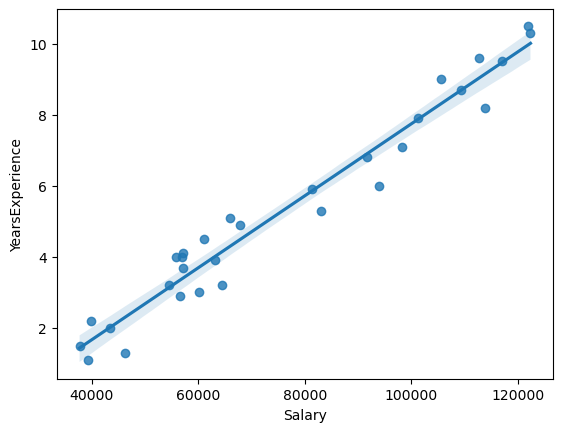

In [35]:
sns.regplot(df['Salary'], df['YearsExperience'])

## Model Building

In [36]:
model = smf.ols('Salary ~ YearsExperience', data=df).fit()

## Model Testing

In [37]:
# Finding Coefficient parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [38]:
# Finding tvalues and pvalues
print(model.tvalues,model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [39]:
# Finding Rsquared Values
print(model.rsquared, model.rsquared_adj)

0.9569566641435086 0.9554194021486339


## Model Predictions

In [40]:
# Manual prediction 
# y = m(x) + c

delivery_time = (9449.962321 * 5) + 25792.200199
delivery_time

73042.01180400001

In [41]:
# Automatic Prediction

new_data = pd.Series([2,6,4,8,9])
new_data = pd.DataFrame(new_data,columns=['YearsExperience'])
new_data

,YearsExperience
0,2
1,6
2,4
3,8
4,9


In [42]:
model.predict(new_data)

0     44692.124842
1     82491.974127
2     63592.049484
3    101391.898770
4    110841.861092
dtype: float64

## Transforming data

In [43]:
x = df.iloc[:,0].values
y = df.iloc[:,1].values
x, y

(array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
         4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
         7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5]),
 array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
         54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
         61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
         98273., 101302., 113812., 109431., 105582., 116969., 112635.,
        122391., 121872.]))

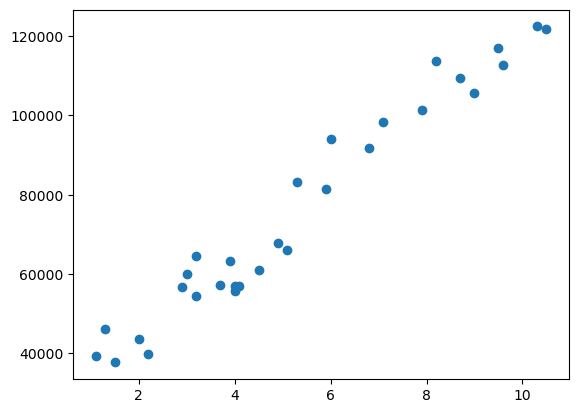

In [44]:
plt.scatter(x,y)

In [45]:
re = LinearRegression()
re.fit(x.reshape(-1,1), y)

ypred =  re.predict(x.reshape(-1,1))
ypred

print(r2_score(y,ypred))
print(np.sqrt(mean_squared_error(y, ypred)))

0.9569566641435086
5592.043608760662


In [46]:
# Transforming data (sqrt)

ysqrt = np.sqrt(y)
xsqrt = np.sqrt(x.reshape(-1,1))

re = LinearRegression()
re.fit(xsqrt.reshape(-1,1), y)

ypred =  re.predict(xsqrt.reshape(-1,1))

print(r2_score(ysqrt,ypred))
print(np.sqrt(mean_squared_error(ysqrt,ypred)))

-2687836.77872225
80057.44834121506


In [47]:
# Transforming data (log)

ylog = np.log(y)
xlog = np.log(x.reshape(-1,1))

re = LinearRegression()
re.fit(xlog.reshape(-1,1), y)

ypred =  re.predict(xlog.reshape(-1,1))

print(r2_score(ylog,ypred))
print(np.sqrt(mean_squared_error(ylog,ypred)))

-48642806750.684654
79969.30711979093


In [48]:
# Transforming data (Square)

ysquare = np.square(y)
xsquare = np.square(x.reshape(-1,1))

re = LinearRegression()
re.fit(xsquare.reshape(-1,1), y)

ypred =  re.predict(xsquare.reshape(-1,1))

print(r2_score(ysquare,ypred))
print(np.sqrt(mean_squared_error(ysquare,ypred)))

-2.206360578559922
7839213526.152041
